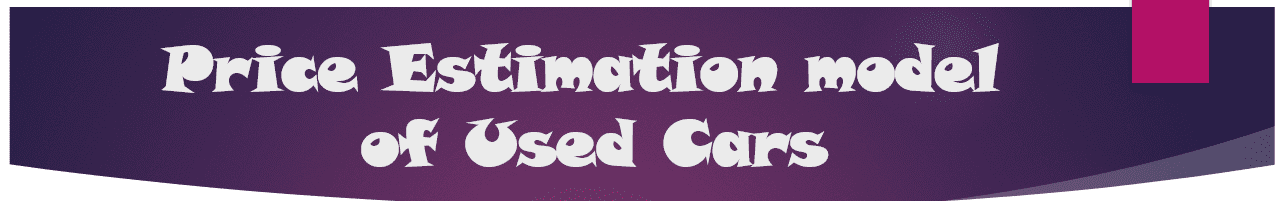

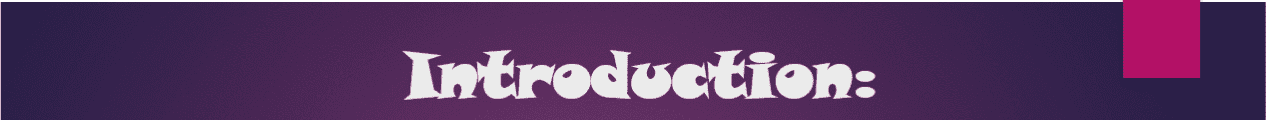

**Study says, the used car market was 1.2 trillion USD in 2020 and is projected to reach over 1.5 trillion USD by 2027 with compound annual growth rate (CAGR) of around 3.2 percent. Hence it is necessary to contribute in organizing the market. Price Estimation model for used cars can solve major problem for both sellers and buyers such as  Informed Decision Making, Market Analysis, Pricing Strategy Optimization, Improved Customer Experience, Risk Mitigation, Research and Development. Therefore, In this project I am going to develop price estimation model using Multiple Linear Regression, Ridge Regression and Polynomial Regression. Finally the comparison of their results are presented to identify best model.**


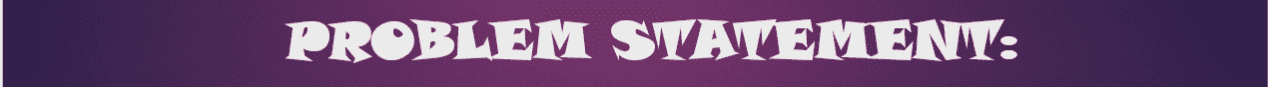

***In simple words- Let's say we have a friend named Elon. And Elon wants to sell his car but the problem is he doesn't know how much he should sell his car for. He wants to sell his car for as much higher as he can and he also wants to set the price reasonably, so someone would want to purchase it. Hence, the price he sets should represent the value of the car.***

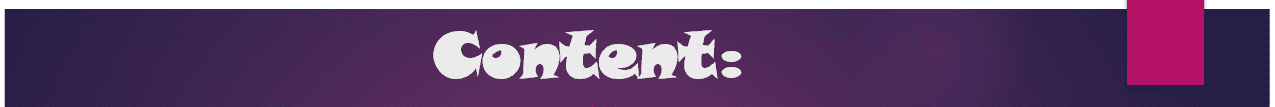

* Reading and exploring data
* Data Wrangling
* Exploratory Data Analysis(EDA)
* Multiple Linear Regression
* Ridge Regression
* Polynomial Regression
* Summary

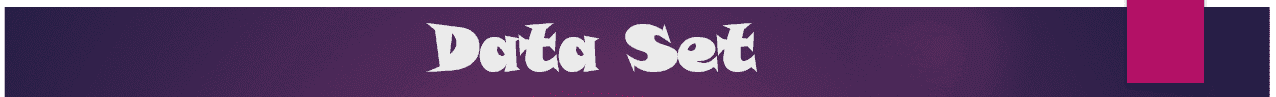
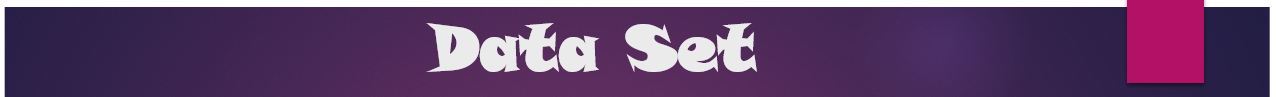

Dataset : The dataset used in this project is an open dataset by Jeffrey C. Schlemmer which includes data on the used car with its features and price.

https://archive.ics.uci.edu/dataset/10/automobile

# Libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

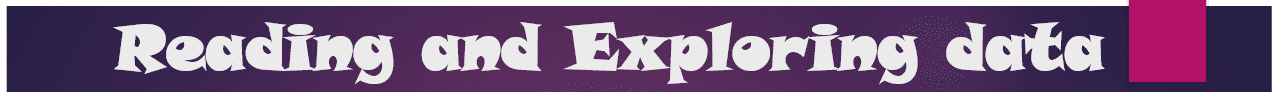
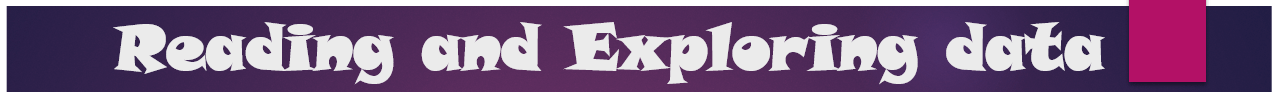

In [ ]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv" # Saving the file path
df=pd.read_csv(path, header=None)

In [ ]:
df.head(3)

In [ ]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Info by:https://archive.ics.uci.edu/dataset/10/automobile

In [ ]:
pd.set_option('display.max_columns', None)
df.columns = headers
df.head(3)

In [ ]:
# We need to replace the "?" symbol with NaN so that we can use dropna() inside numpy to deal with the missing values
df1=df.replace('?',np.NaN)

In [ ]:
# We can drop whole row of missing values along the column "price" (target variable) since they contibute nothing to model. 
df=df1.dropna(subset=["price"], axis=0)
df.head(3)

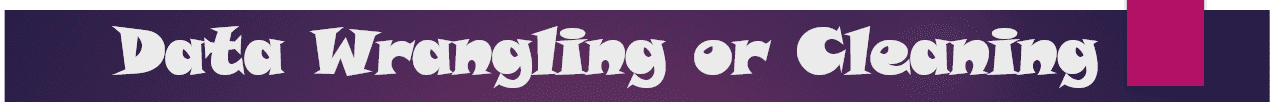
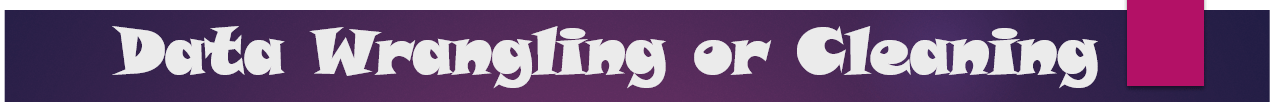

### 1. Dealing with missing values

In [ ]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Based on the summary above, each column has 201 rows of data and six of the columns containing missing data:

    1."normalized-losses": 37 missing data
    2."num-of-doors": 2 missing data
    3."bore": 4 missing data
    4."stroke" : 4 missing data
    5."horsepower": 2 missing data
    6."peak-rpm": 2 missing data


In [ ]:
#Converting all these attributes into float for performating mathematical function
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis=0)
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
avg_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)

In [ ]:
#replacing all NaN's with mean of the column
pd.options.mode.chained_assignment = None
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)

In [ ]:
#replacing with mode(frequency)
df['num-of-doors'].mode()

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
#Lets check is there any missing value now
df.isnull().sum()

#### Data looks good

### 2. Dealing with data format

In [ ]:
#Converting data types to proper format
df.dtypes

In [ ]:
df[["bore", "stroke","price","peak-rpm","horsepower"]] =df[["bore", "stroke","price","peak-rpm","horsepower"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

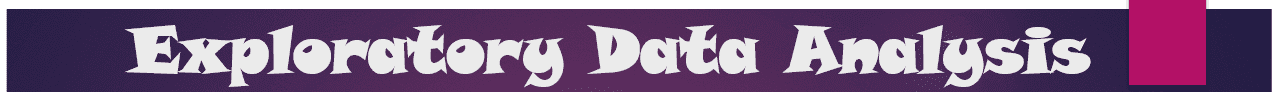
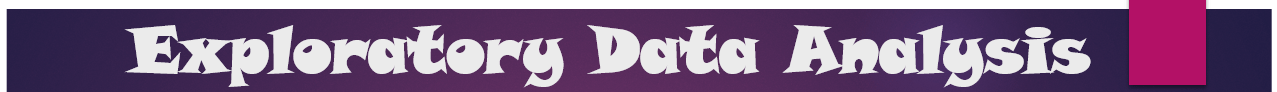

In [ ]:
# Finding significant Predictor from numerical attributes
corrmat= df.corr()
corrmat["price"].sort_values()
plt.figure(figsize=(15,7))  
sns.heatmap(corrmat,annot=True,center=0)

#### We can already identify good predictor by looking into to last row in the heat map. Value close to 1 or -1 is highly correlated.

In [ ]:
#Applying Pearson Correlation method to measure strength of correlation
def correlation(x):
  pearson_coef, p_value = stats.pearsonr(x, df['price'])
  print('The pearson coefficient:', pearson_coef, ' and p_value is:', p_value,)

In [ ]:
print("For Highway-mpg")
correlation(df['highway-mpg'])
print("For city-mpg")
correlation(df['city-mpg'])
print("For peak-rpm")
correlation(df['peak-rpm'])
print("For symboling")
correlation(df['symboling'])
print("For compression-ratio")
correlation(df['compression-ratio'])
print("For stroke")
correlation(df['stroke'])
print("For normalized-losses")
correlation(df['normalized-losses'])
print("For height")
correlation(df['height'])
print("For bore")
correlation(df['bore'])
print("For wheel-base")
correlation(df['wheel-base'])
print("For length")
correlation(df['length'])
print("For width")
correlation(df['width'])
print("For curb-weight")
correlation(df['curb-weight'])
print("For engine-size")
correlation(df['engine-size'])
print("For horsepower")
correlation(df['horsepower'])


In [ ]:
#Visualing top numerical perdictors correlation
def pairs(x, fig):
  plt.subplot(4, 2, fig)
  plt.scatter(df[x], df['price'],c='#d62728',alpha=1,marker='^')
  plt.xlabel(x)
  plt.ylabel('Price')

In [ ]:
plt.figure(figsize=(15,20))
pairs('engine-size', 1)
pairs('curb-weight', 2)
pairs('horsepower', 3)
pairs('width', 4)
pairs('highway-mpg', 5)
pairs('city-mpg', 6)
pairs('length', 7)

<p>From the above results, The top predictors/independent variables from numerical data are:</p>
      <li>1. engine-size: Positive Correlation
      <li>2. curb-weight: Positive Correlation
      <li>3. horspower  : Positive Correlation
      <li>4. width      : Positive Correlation
      <li>5. highway-mpg: Negative Correlation
      <li>6. cit-mpg    : Negative Correlation
      <li>7. length     : Positive Correlation

In [ ]:
# Finding significant Predictor from categorical attributes
df.select_dtypes(include='object').columns.tolist()  #Retriving column names of object type

In [ ]:
def plots(data, fig):
  plt.subplot(10,2,fig)
  sns.boxplot(x = data,y="price", data = df,palette=("rocket"))

plt.figure(figsize=(20,40))
plt.tight_layout()
plots('fuel-type', 1)
plots('aspiration', 2)
plots('num-of-doors', 3)
plots('body-style', 4)
plots('drive-wheels', 5)
plots('engine-location', 6)
plots('engine-type', 7)
plots('num-of-cylinders', 8)
plots('fuel-system', 9)
plt.figure(figsize=(20,10))
sns.boxplot(x ='make',y="price", data = df, palette=("rocket"))


We see that the distributions of "price" between different variables."engine-location" categories, front and rear, 
are distinct enough to take engine-location as a potential good predictor of price. However, All other variables have   
have a significant overlap, so they would not be a good predictor of price

<p>Summary :The variables are narrowed down to the following:</p>

Continuous numerical variables:
    <li>engine-size</li>
    <li>curb-weight</li>
    <li>horsepower</li>
    <li>width</li>
    <li>highway-mpg</li>
    <li>city-mpg</li><li>length</li>    
    
Categorical variables:
    <li>engine-location</li>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.<p>



In [ ]:
#Applying One-Hot Coding for engine-location (Turning Categorical variable to quantitative for modelling)
dummy = pd.get_dummies(df["engine-location"])
dummy.head()

In [ ]:
dummy.rename(columns={'front':'engine-location-front', 'rear':'engine-location-rear'}, inplace=True)
dummy.head()

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy], axis=1)

# drop original column "fuel-type" from "df"
df.drop("engine-location", axis = 1, inplace=True)

In [ ]:
#Considering Significant predictor variables
model_data = df[["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]]

In [ ]:
model_data.head(3)

In [ ]:
#Normalization: required to bring range of value into similar range 
scaler = StandardScaler()
x_data = scaler.fit_transform(model_data)
x_data = pd.DataFrame(x_data)

In [ ]:
x_data.columns = ["engine-size","curb-weight","horsepower","width","highway-mpg","city-mpg","length","engine-location-front","engine-location-rear"]
x_data.head()

In [ ]:
y_data = df["price"]
y_data

# Model Development

In [ ]:
#Spliting test and train data with standard ratio
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.4,random_state=1)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

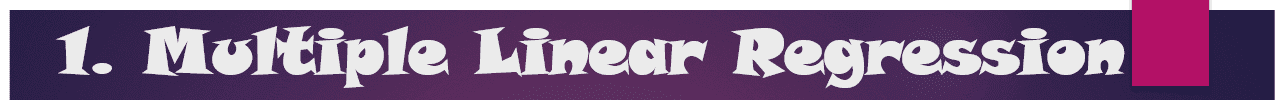
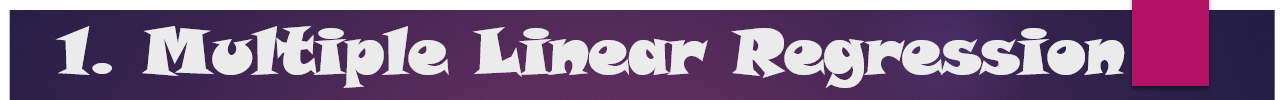

In [ ]:
#creating object, using which we could generate instances.
lm = LinearRegression() 

In [ ]:
#Fitting model by supplying train data
lm.fit(x_train,y_train)

In [ ]:
yhat_MLR = lm.predict(x_test)
print("Predicted price for test data are:", yhat_MLR[0:5].tolist())

## Model Evaluation

### 1. Visualization Method

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Multiple Linear Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_MLR,hist=False,color='red',label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

###  2. In-Sample Method

In [ ]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_MLR)
print('The mean square error of price and predicted value is: ', mse)
    

In [ ]:
#R-Squared
print('the R-Squared value of fitted model is:',lm.score(x_train,y_train))

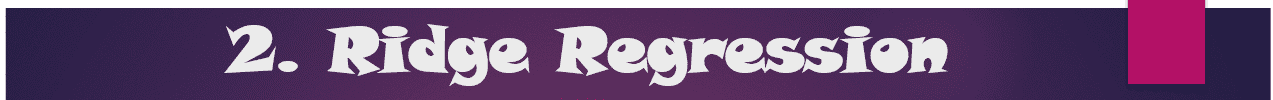
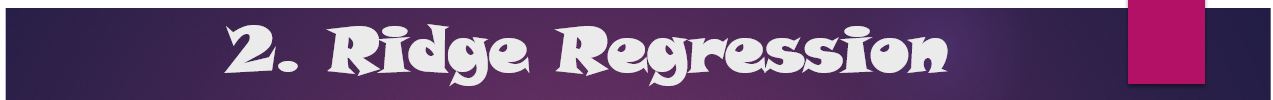

In [ ]:
#Identifing value of Alpha using auto iterative method called GridSearchCV().
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}] #initializing alpha value to obtain best one.
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data, y_data)
BestRR=Grid1.best_estimator_
BestRR

In [ ]:
#Creating object though which instances can be created in further steps.
RidgeModel = Ridge(alpha=10)

In [ ]:
#Fitting Ridge model
RidgeModel.fit(x_train,y_train)

In [ ]:
yhat_Ridge = RidgeModel.predict(x_test)

In [ ]:
print("Predicted price for test data are:", yhat_Ridge[0:5].tolist())

## Model Evaluation

### 1. Visualization Method 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Ridge Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_Ridge,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

### 2. In-Sample Method

In [ ]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_Ridge)
print('The mean square error of price and predicted value is: ', mse)

In [ ]:
#R-Squared
print('the R-Squared value of fitted model is:',RidgeModel.score(x_train,y_train))

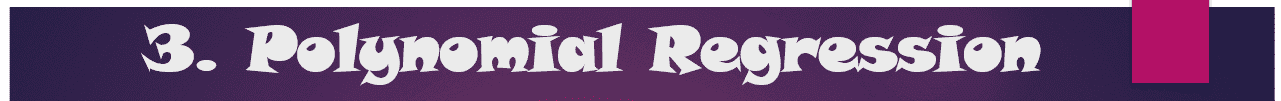
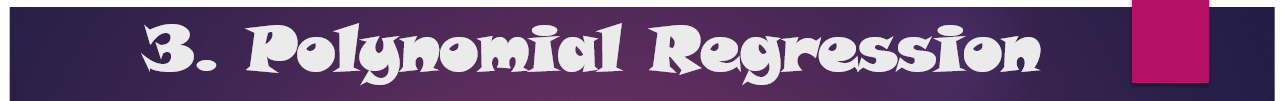

In [ ]:
#Creating object though which instances can be created in further steps.
PolyModel=PolynomialFeatures(degree=2)  # Degree 2 is fixed after trail and error as its o/p was top.

In [ ]:
#Transforming data to feed polynomial model
x_train_pr=PolyModel.fit_transform(x_train)
x_test_pr=PolyModel.fit_transform(x_test)

In [ ]:
poly1=LinearRegression().fit(x_train_pr,y_train)

In [ ]:
yhat_poly=poly1.predict(x_test_pr)

## Model Evaluation

### 1. Visualization Method 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.title("Polynomial Regression (Actual Price v/s Predicted Price)")
ax1 = sns.distplot(y_test,hist=False,color="purple",label="Actual Value")
sns.distplot(yhat_poly,hist=False,color="r",label="Fitted Value",ax=ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

### 2. In-Sample Method

In [ ]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat_poly)
print('The mean square error of price and predicted value is: ', mse)

In [ ]:
#R-Squared
print('the R-Squared value of fitted model is:',poly1.score(x_train_pr,y_train))

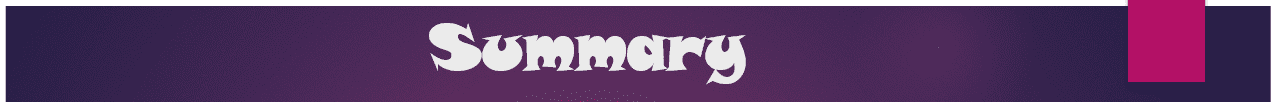
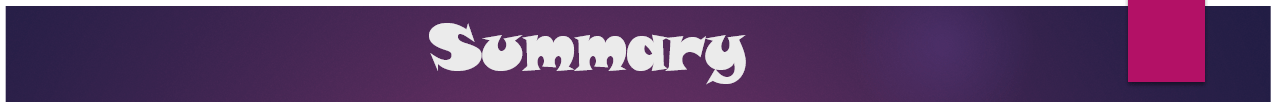

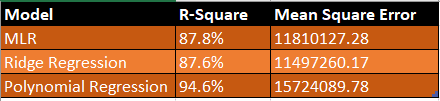

<li>Clearly, Polynomial Regression out performs other two model with sizzling 95% of accurancy.We can say that ~95 % of the variation of price is explained by this polynomail regression.

<li>However, as polynomial regression can be used to solve multi-collinearity, they are proned to suffer overfitting. Hence, proper evaluation need to be done while using Polynomial regression for the prediction.

<li>Now, Elon can gather values of all the significant variable mentioned above, to know the estimated value of his car. If you like the work then please consider upvote and happy to answer any question in comment section. 😃👍🚗🚗 